# Task 1: Exploratory Data Analysis (EDA)

Q1.	Load the dataset and perform basic data exploration.

Q2.	Examine the distribution of features using histograms, box plots, or density plots.

Q3.	Investigate correlations between features to understand relationships within the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
df= pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
# Examine the structure of the dataset
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns)
print("\nData Types:\n", df.dtypes)

Dataset Shape: (178, 14)

Columns: Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

Data Types:
 Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object


In [4]:
# Summarize the data
print("\nSummary Statistics:")
df.describe(include='all')  # Include all columns in summary


Summary Statistics:


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


#### Handle null values

In [5]:
# Check for any missing values
print("\nMissing values:")
df.isnull().sum()


Missing values:


Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

We can conclude that there are no null values in the dataset.

#### Handling outliers

In [6]:
# Detect outliers using z-score method
z_scores = np.abs(zscore(df))
threshold = 3  # Define a threshold (typically |z-score| > 3 indicates an outlier)
outliers = (z_scores > threshold).any(axis=1)
outlier_rows = df[outliers]
outlier_rows

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
25,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830
59,2,12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520
69,2,12.21,1.19,1.75,16.8,151,1.85,1.28,0.14,2.50,2.85,1.28,3.07,718
73,2,12.99,1.67,2.60,30.0,139,3.30,2.89,0.21,1.96,3.35,1.31,3.50,985
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
110,2,11.46,3.74,1.82,19.5,107,3.18,2.58,0.24,3.58,2.90,0.75,2.81,562
115,2,11.03,1.51,2.20,21.5,85,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407
121,2,11.56,2.05,3.23,28.5,119,3.18,5.08,0.47,1.87,6.00,0.93,3.69,465
123,2,13.05,5.80,2.13,21.5,86,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380
158,3,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660


In [7]:
# Treat outliers

#Replace outliers with NaN
df = df.mask(outliers)
# Dropping rows with any missing values
df.dropna(axis=0, inplace=True)

# Modified dataset
print("Modified dataset: ")
df

Modified dataset: 


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.0,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,3.0,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,3.0,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,3.0,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


#### Visualizing feature distribution

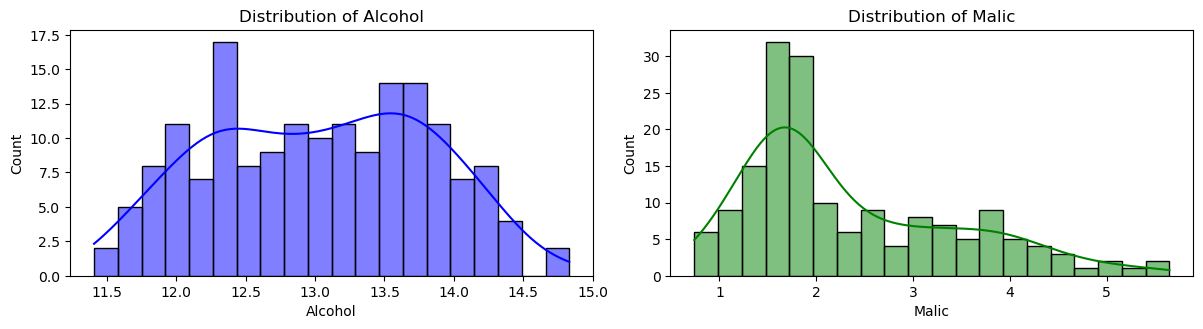

In [8]:
# Histograms for a few numerical columns

import seaborn as sns

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
sns.histplot(df['Alcohol'], bins=20, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Alcohol')
plt.subplot(2, 2, 2)
sns.histplot(df['Malic'], bins=20, kde=True, color='green', edgecolor='black')
plt.title('Distribution of Malic')
# Adjust layout
plt.tight_layout()
plt.show()

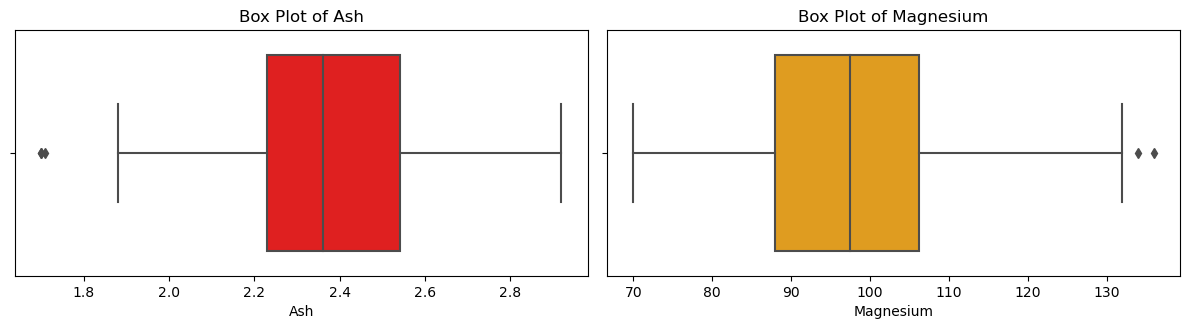

In [9]:
# Box plots for a few numerical columns
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 3)
sns.boxplot(x=df['Ash'], color='red')
plt.title('Box Plot of Ash')
plt.subplot(2, 2, 4)
sns.boxplot(x=df['Magnesium'], color='orange')
plt.title('Box Plot of Magnesium')
plt.tight_layout()
plt.show()

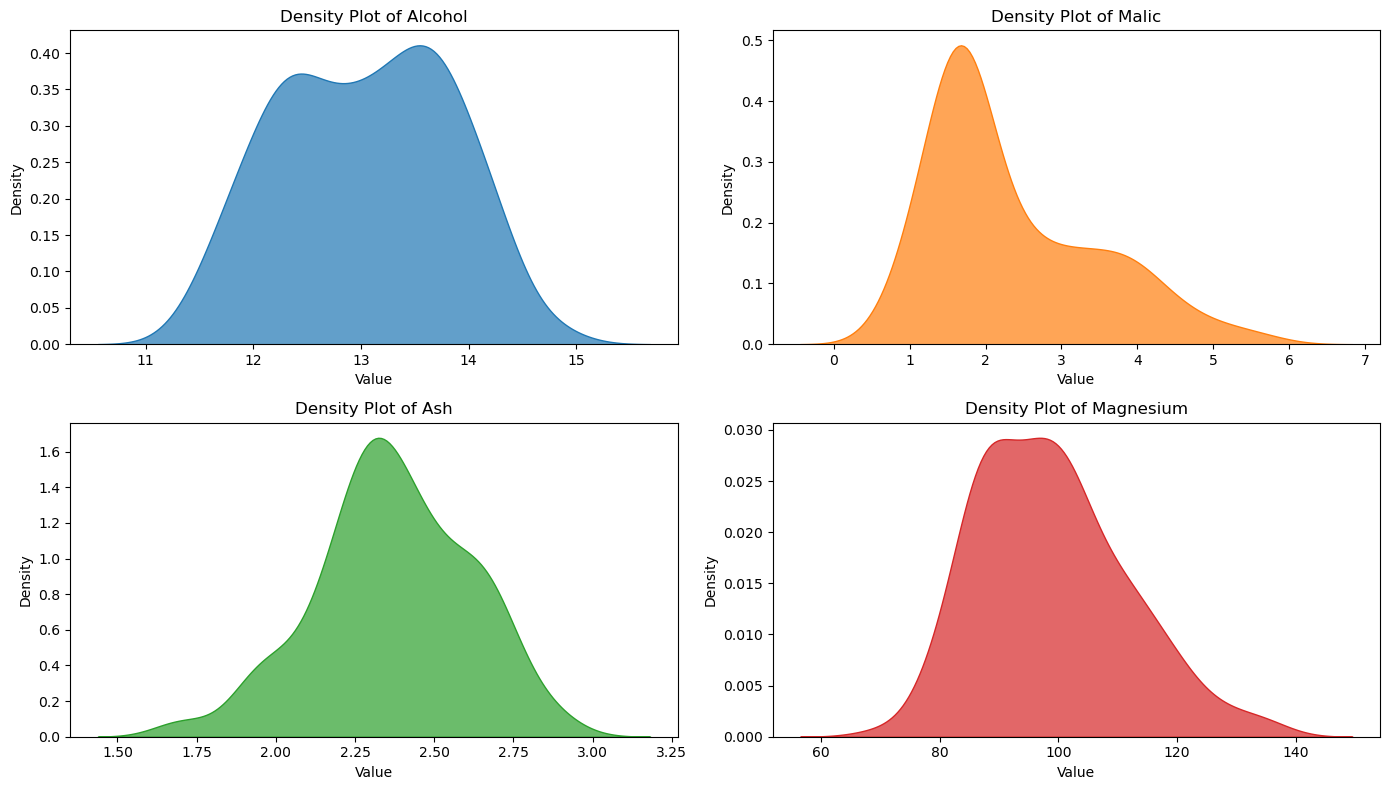

In [10]:
# Density plots for a few numerical columns

# Select columns for density plot
columns = ['Alcohol', 'Malic', 'Ash', 'Magnesium']
# Set up the matplotlib figure
plt.figure(figsize=(14, 8))
# Plot density plots for each selected column
for i, col in enumerate(columns, start=1):
    plt.subplot(2, 2, i)
    sns.kdeplot(df[col], fill=True, color=f'C{i-1}', alpha=0.7)
    plt.title(f'Density Plot of {col}')
    plt.xlabel('Value')
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

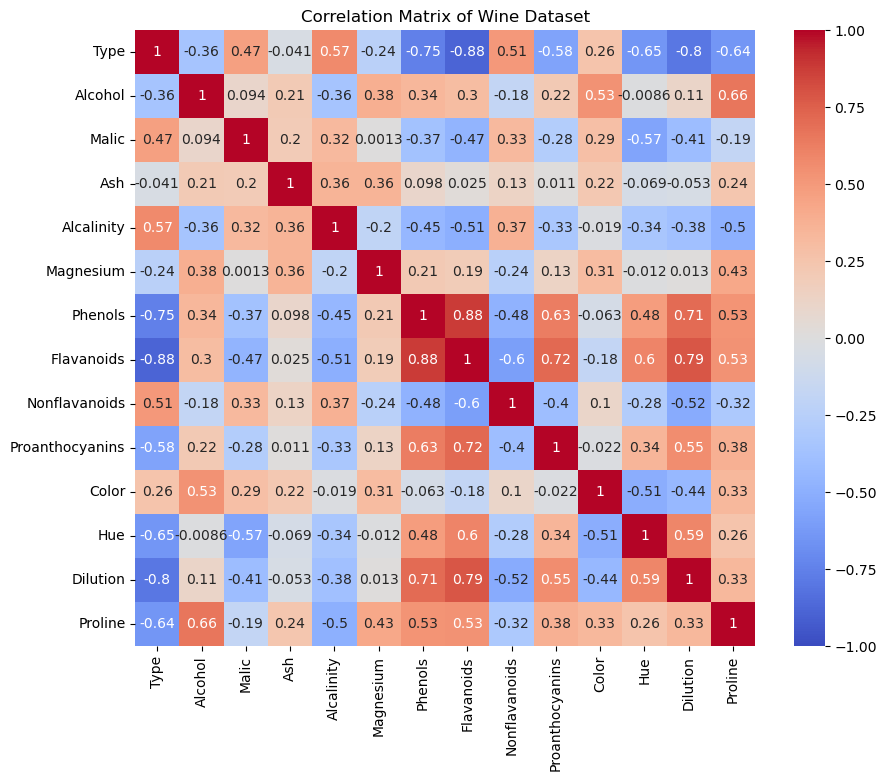

In [13]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Matrix of Wine Dataset')
plt.show()

# Task 2: Dimensionality Reduction with PCA

Q1.	Standardize the features to ensure they have a mean of 0 and a standard deviation of 1. Implement PCA to reduce the dimensionality of the dataset.

Q2.	Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.

Q3.	Transform the original dataset into the principal components.

In [14]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Selecting only numerical columns for standardization
numerical_columns = df.columns.tolist()

In [15]:
# Standardize the Features
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df[numerical_columns])

# Creating a DataFrame for standardized data
df_standardized = pd.DataFrame(df_standardized, columns=numerical_columns)

# Print the first few rows of the standardized dataset
print("Standardized Data:")
df_standardized.head()

Standardized Data:


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,-1.186165,1.513539,-0.578842,0.250637,-1.209653,2.253466,0.840250,1.068668,-0.669081,1.395565,0.233962,0.403766,1.857453,0.980537
1,-1.186165,0.210929,-0.514888,-0.945351,-2.624711,0.097439,0.600640,0.763248,-0.830933,-0.517348,-0.329398,0.449249,1.127605,0.933414
2,-1.186165,0.160342,0.015009,1.240421,-0.244840,0.177292,0.840250,1.251920,-0.507230,2.380432,0.251846,0.358284,0.804788,1.357515
3,-1.186165,1.690593,-0.359574,0.539324,-0.823728,1.135526,2.517517,1.506437,-0.992784,1.187228,1.199721,-0.414920,1.197783,2.284254
4,-1.186165,0.261516,0.225141,2.065240,0.527010,1.534790,0.840250,0.691983,0.221100,0.505398,-0.356225,0.403766,0.467935,-0.056154


In [16]:
# Implement PCA to Reduce Dimensionality

# Fit PCA and transform the dataset
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_standardized)

# Creating a DataFrame for PCA-transformed data
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(df_pca.shape[1])])

# Print the first few rows of the PCA-transformed dataset
print("PCA-transformed Data:")
df_pca.head()

PCA-transformed Data:


,PC1,PC2
0,3.665097,1.586766
1,2.663560,-0.328564
2,2.876577,0.940561
3,4.035396,2.717890
4,1.405724,0.980778


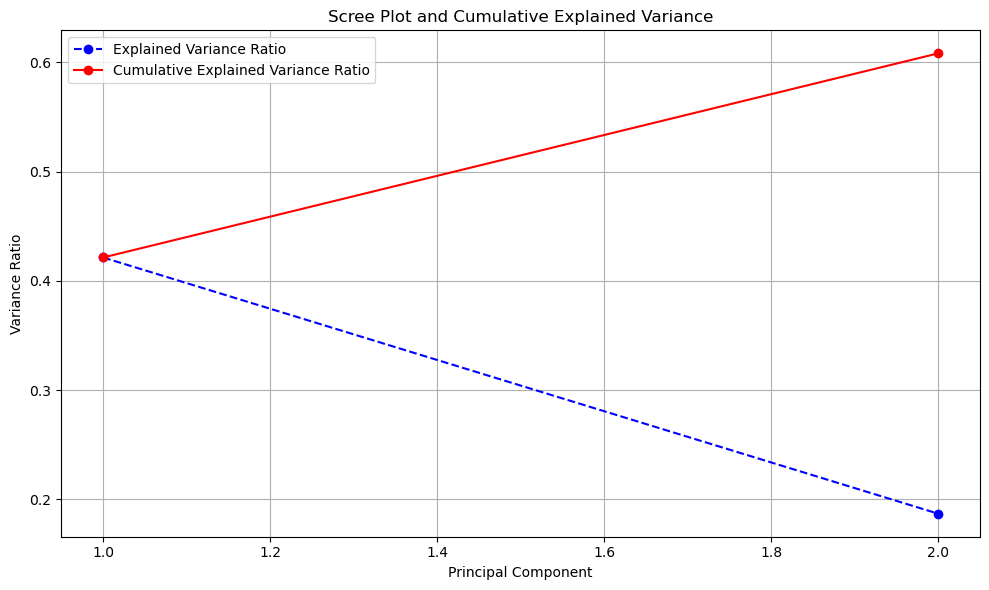

In [17]:
# Determine the Optimal Number of Principal Components

import matplotlib.pyplot as plt

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plotting Scree plot and Cumulative Explained Variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o', linestyle='--', color='b', 
         label='Explained Variance Ratio')
plt.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, marker='o', color='r', 
         label='Cumulative Explained Variance Ratio')
plt.title('Scree Plot and Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
# Print explained variance ratios
print("\nExplained Variance Ratios:")
for i, ratio in enumerate(explained_variance_ratio, 1):
    print(f"Component {i}: {ratio:.4f}")

# Determine the optimal number of components to retain 95% variance
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"\nOptimal Number of Components to Retain 95% Variance: {n_components}")

explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")


Explained Variance Ratios:
Component 1: 0.4214
Component 2: 0.1869

Optimal Number of Components to Retain 95% Variance: 1
Explained Variance Ratio: [0.42138058 0.18685543]


In [19]:
# Print the first few rows of the original dataset
print("Original Data:")
df.head()

Original Data:


,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,1.0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,1.0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,1.0,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,1.0,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [20]:
# Print the first few rows of the PCA-transformed dataset
print("PCA-transformed Data:")
df_pca.head()

PCA-transformed Data:


,PC1,PC2
0,3.665097,1.586766
1,2.663560,-0.328564
2,2.876577,0.940561
3,4.035396,2.717890
4,1.405724,0.980778


# Task 3: Clustering with Original Data

Q1.	Apply a clustering algorithm (e.g., K-means) to the original dataset.

Q2.	Visualize the clustering results using appropriate plots.

Q3.	Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

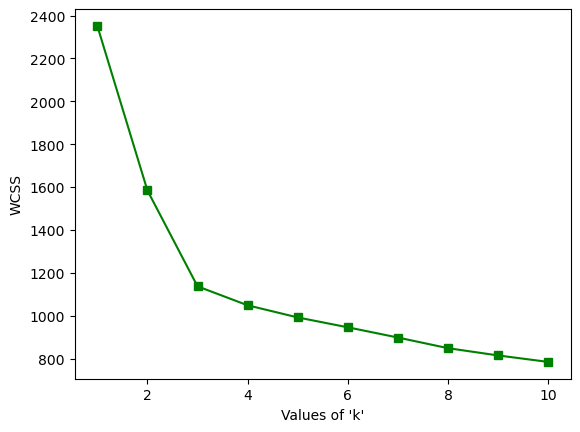

In [21]:
# Applying K-means clustering algorithm to the original dataset

from sklearn.cluster import KMeans

# Using Elbow Method
wcss = {} 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_standardized) 
    wcss[i] = kmeans.inertia_
     
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

We can see that the elbow is forming at k=3. Hence the right number of cluster for the given dataset is 3.

In [22]:
# Model Fitting & Cluster Formation
kmeans=KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_standardized)

centers = kmeans.cluster_centers_

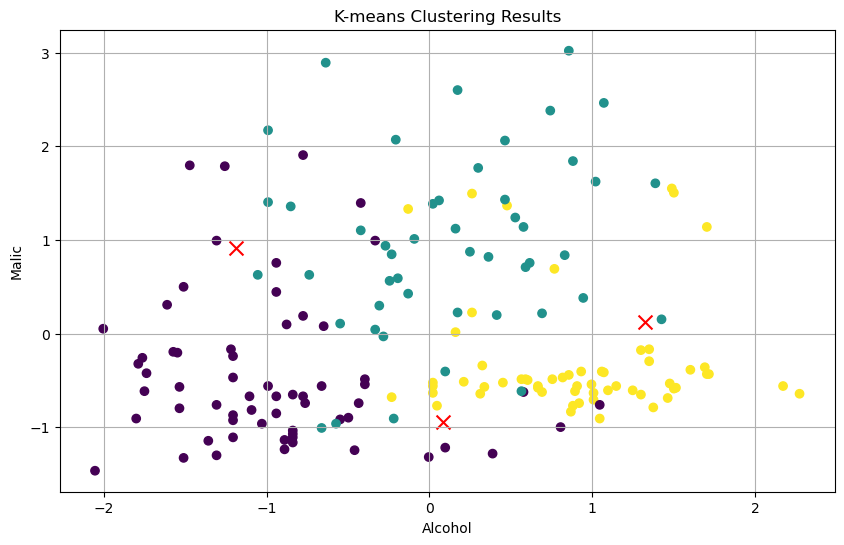

In [23]:
# Visualizing the clusters (considering first two principal components for simplicity)
plt.figure(figsize=(10, 6))
plt.scatter(df_standardized['Alcohol'],df_standardized['Malic'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.title('K-means Clustering Results')
plt.xlabel('Alcohol')
plt.ylabel('Malic')
plt.grid(True)
plt.show()

In [24]:
# Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculate Silhouette score
silhouette_avg = silhouette_score(df_standardized, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Calculate Davies-Bouldin Score
db_index = davies_bouldin_score(df_standardized, kmeans.labels_)
print(f"Davies–Bouldin Index: {db_index:.3f}")

Silhouette Score: 0.3210
Davies–Bouldin Index: 1.249


# Task 4: Clustering with PCA Data

Q1.	Apply the same clustering algorithm to the PCA-transformed dataset.

Q2.	Visualize the clustering results obtained from PCA-transformed data.

Q3.	Compare the clustering results from PCA-transformed data with those from the original dataset.

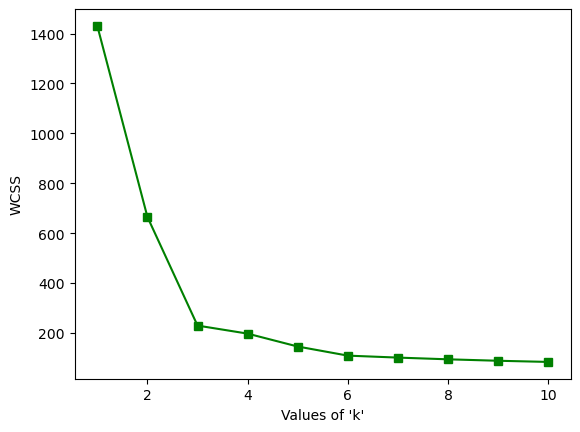

In [25]:
# Applying the K-means clustering algorithm to the PCA-transformed dataset

# Using Elbow Method
wcss = {} 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(df_pca) 
    wcss[i] = kmeans.inertia_
     
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

There is a clear visible "elbow" at k=3. Hence the right number of clusters for the given dataset is 3.

In [26]:
# Model Fitting & Cluster Formation
kmeans=KMeans(n_clusters=3)
kmeans.fit(df_pca)

centers = kmeans.cluster_centers_

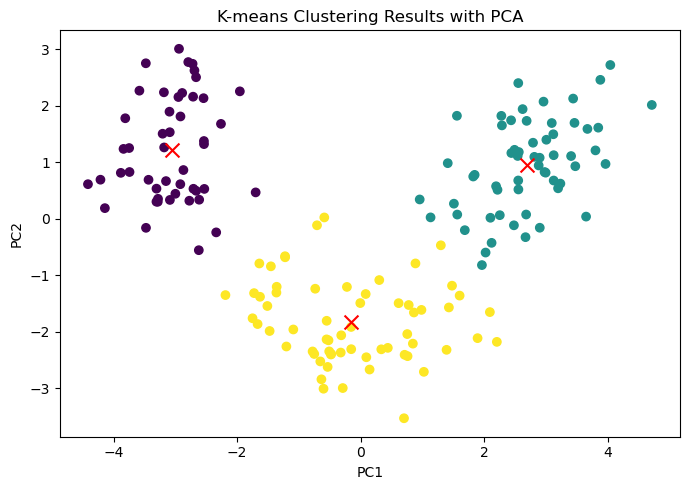

In [27]:
# Visualizing the clustering results obtained from PCA-transformed data

plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(df_pca['PC1'],df_pca['PC2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering Results with PCA')
plt.tight_layout()

In [28]:
# Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.

# Calculate Silhouette score
silhouette_avg = silhouette_score(df_pca, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg:.4f}")

# Calculate Davies-Bouldin score
db_index = davies_bouldin_score(df_pca, kmeans.labels_)
print(f"Davies–Bouldin Index: {db_index:.3f}")

Silhouette Score: 0.6062
Davies–Bouldin Index: 0.532


#### Comparing the clustering results

1. Original Dataset: 
    1. Silhouette Score: 0.3210
    2. Davies–Bouldin Index: 1.249
2. PCA-transformed Dataset: 
    1. Silhouette Score: 0.6075
    2. Davies–Bouldin Index: 0.531

#### Analysis
1. Silhouette Score: The silhouette score for the PCA-transformed dataset (0.6075) is notably higher than that of the original 
    dataset (0.3210). A higher silhouette score indicates better-defined clusters with more separation between clusters and more
    compact within-cluster distances. This suggests that clustering in the reduced-dimensional PCA space has resulted in more 
    distinct and well-separated clusters compared to clustering in the original high-dimensional space.
2. Davies–Bouldin Index: The Davies–Bouldin index for the PCA-transformed dataset (0.531) is significantly lower than that of 
    the original dataset (1.249). A lower Davies–Bouldin index indicates better clustering, with tighter and more separated 
    clusters. The decrease in Davies–Bouldin index further supports the finding that clustering in the PCA-transformed space 
    has produced clusters that are more cohesive and less overlapping compared to clustering in the original space.

# Task 5: Comparison and Analysis

Q1. Compare the clustering results obtained from the original dataset and PCA-transformed data.

Q2. Discuss any similarities or differences observed in the clustering results.

Q3. Reflect on the impact of dimensionality reduction on clustering performance.

Q4. Analyze the trade-offs between using PCA and clustering directly on the original dataset.

#### Interpretation

1. Dimensionality Reduction Effectiveness: PCA has effectively reduced the dimensionality of the dataset while preserving or 
    even enhancing the clustering structure. By focusing on the principal components that capture the most variance in the data,
    PCA has potentially removed noise and irrelevant variations, allowing K-means clustering to identify clearer and more 
    meaningful clusters.
2. Improved Cluster Separation: The higher silhouette score and lower Davies–Bouldin index in the PCA-transformed dataset 
    indicate that the clusters are more distinct and better separated in the reduced-dimensional space. This suggests that PCA 
    has improved the clustering performance by emphasizing the dominant patterns in the data, which might have been obscured or 
    diluted in the original high-dimensional space.

#### Considerations

1. Interpretability: While PCA improves clustering performance metrics, it may also obscure some details present in the original
    dataset. Understanding the principal components and their relation to the original features is crucial for interpreting the 
    clusters in the PCA-transformed space.
2. Practical Application: The choice between using the original dataset or PCA-transformed dataset for clustering depends on the
    specific objectives and trade-offs in the analysis. PCA can be particularly useful for large datasets with high 
    dimensionality where reducing computational complexity and focusing on the most informative dimensions are priorities.

#### Conclusion

In conclusion, the comparison of clustering results between the original dataset and PCA-transformed dataset shows that PCA can 
significantly enhance clustering performance metrics such as silhouette score and Davies–Bouldin index by reducing 
dimensionality and emphasizing dominant patterns in the data. This highlights the effectiveness of PCA as a preprocessing step 
for clustering analysis in data-driven applications.

# Task 6: Conclusion and Insights

Q1. Summarize the key findings and insights from the assignment.

Q2. Discuss the practical implications of using PCA and clustering in data analysis.

Q3. Provide recommendations for when to use each technique based on the analysis conducted.

#### Key findings and insights

1. Clustering Performance Metrics:
    1. Original Dataset: The silhouette score was 0.3210, indicating moderate separation between clusters, and the Davies–Bouldin index was 1.249, suggesting some overlap and less defined clusters.
    2. PCA-transformed Dataset: The silhouette score significantly improved to 0.6075, indicating better-defined and more separated clusters. The Davies–Bouldin index also improved to 0.531, reflecting tighter and more distinct clusters.
2. Effectiveness of PCA:
    1. PCA effectively reduced the dimensionality of the dataset while preserving or enhancing clustering performance metrics. 
    2. This dimensionality reduction led to clearer cluster separation and improved clustering quality, as evidenced by higher silhouette scores and lower Davies–Bouldin index.
3. Interpretability and Trade-offs:
    1. Clustering on the original dataset allows for direct interpretation of clusters in terms of the original features. This approach is beneficial when detailed insights into feature relationships are crucial.
    2. PCA-transformed dataset sacrifices direct interpretability in favor of improved clustering performance and reduced computational complexity. It focuses on capturing the most informative dimensions, which may obscure fine-grained feature interactions present in the original dataset.

#### Practical implications of using PCA and clustering in data analysis

1. Dimensionality Reduction:
    1. Efficient Processing: PCA reduces the number of dimensions (features) in the dataset while retaining the most important information. This reduction can lead to faster computation times and more efficient storage of data.
    2. Noise Reduction: By focusing on the principal components that capture the maximum variance in the data, PCA can help filter out noise and irrelevant variations, thereby improving the quality of subsequent analyses such as clustering.
2. Improved Visualization:
    1. High-Dimensional Data Visualization: PCA transforms high-dimensional data into a lower-dimensional space (e.g., 2D or 3D), making it easier to visualize and interpret complex data patterns. This visualization aids in exploratory data analysis and facilitates insights into data structure and relationships.
3. Enhanced Clustering Performance:
    1. Clearer Cluster Separation: PCA often improves clustering performance by highlighting the most significant dimensions of variation in the data. This can result in better-defined clusters with more distinct boundaries, as evidenced by metrics like silhouette score and Davies–Bouldin index.
    2. Interpretability: Clustering in the PCA-transformed space can provide insights into the dominant patterns and structures in the data, albeit at the cost of losing direct interpretability in terms of original features.
4. Preprocessing for Machine Learning:
    1. Feature Engineering: PCA can serve as a preprocessing step for machine learning algorithms, especially when dealing with high-dimensional data. It helps in reducing multicollinearity among features and improving the efficiency and effectiveness of predictive models.
    2. Normalization of Data: PCA often normalizes data in terms of variance, which can make subsequent analyses more robust and less sensitive to the scale and distribution of original features.
5. Interpretation Challenges:
    1. Loss of Feature Interpretability: In PCA-transformed space, interpreting clusters and patterns in terms of original features becomes challenging because principal components are linear combinations of original features.
    2. Trade-offs: There is a trade-off between dimensionality reduction and loss of information. PCA captures the most  significant variations but may obscure subtle relationships or interactions present in the original data.
6. Practical Considerations:
    1. Choosing the Number of Components: Selecting the right number of principal components in PCA requires careful consideration to balance dimensionality reduction benefits with retained information. Techniques like scree plots, cumulative explained variance, or cross-validation can assist in determining the optimal number of components.
    2. Validation and Iteration: It's essential to validate the results of PCA and clustering using appropriate metrics and to iterate as necessary based on insights gained from initial analyses.

#### Recommendations for Usage

1. Original Dataset: Use when interpretability of clusters in terms of original features is essential, and when detailed feature relationships matter for the analysis.
2. PCA-transformed Dataset: Prefer when dealing with high-dimensional data to improve clustering performance metrics, enhance cluster separation, and reduce noise.
3. Practical Applications: PCA can be particularly advantageous in scenarios where computational resources are limited or when dealing with datasets with many features. It allows for more efficient clustering algorithms and clearer identification of meaningful patterns in data.
4. Iterative Analysis Approach: Consider iteratively refining clustering approaches based on initial findings. Compare clustering results between original and PCA-transformed datasets to balance trade-offs between dimensionality reduction and clustering performance.

#### Conclusion

In conclusion, the assignment highlighted the benefits of PCA in improving clustering outcomes by reducing dimensionality and 
enhancing cluster separation metrics. It underscored the importance of considering both the original dataset for detailed 
insights and the PCA-transformed dataset for improved clustering performance in data-driven analyses. These insights are crucial
for making informed decisions regarding data preprocessing and clustering methodologies based on specific analytical goals and 
constraints.